In [1]:
# Install required packages
%pip install matplotlib numpy langchain_openai langchain-core openai python-dotenv

# Import the correct modules
from langchain_openai import OpenAIEmbeddings  # Updated import path
from dotenv import load_dotenv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Show installed package versions for debugging
print(f"Python version: {sys.version}")
print(f"Installed package versions:")
%pip freeze | grep -E "langchain|openai|matplotlib"




# # Import the correct modules
# from langchain.embeddings import OpenAIEmbeddings
# from dotenv import load_dotenv
# import os
# import sys



# Load environment variables from .env file
load_dotenv()

# Check if API key is available
if not os.getenv("OPENAI_API_KEY"):
    print("Warning: OPENAI_API_KEY not found in environment variables")
    
# Initialize OpenAI embeddings with the updated class
try:
    embeddings = OpenAIEmbeddings()
    print("OpenAIEmbeddings initialized successfully")
except Exception as e:
    print(f"Error initializing OpenAIEmbeddings: {e}")

Note: you may need to restart the kernel to use updated packages.
Python version: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Installed package versions:
Note: you may need to restart the kernel to use updated packages.


'grep' is not recognized as an internal or external command,
operable program or batch file.


OpenAIEmbeddings initialized successfully


In [2]:
import numpy as np

def calculate_l2(v1, v2):
    return np.linalg.norm(v1 - v2) ** 2

In [3]:
import matplotlib.pyplot as plt
import textwrap

def wrap_labels(labels, width):
    # Wraps long text labels to multiple lines for better display
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

def plot(data, words):
    # Creates a heatmap visualization of the data matrix
    fig, ax = plt.subplots()
    ax.imshow(data, cmap="Blues")  # Display the matrix as a heatmap with blue color scheme

    # Wrap long text labels and set them as x and y tick labels
    labels = wrap_labels(words, 30)
    ax.set_xticks(np.arange(len(words)), labels=labels)
    ax.set_yticks(np.arange(len(words)), labels=labels)

    # Position the x labels at the top of the plot
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # Rotate the x labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
            rotation_mode="anchor")

    # Add the numeric values inside each cell of the heatmap
    for i in range(len(words)):
        for j in range(len(words)):
            text = ax.text(j, i, round(data[i, j], 2),
                        ha="center", va="center")

    # Adjust layout to make everything fit
    fig.tight_layout()
    plt.show()

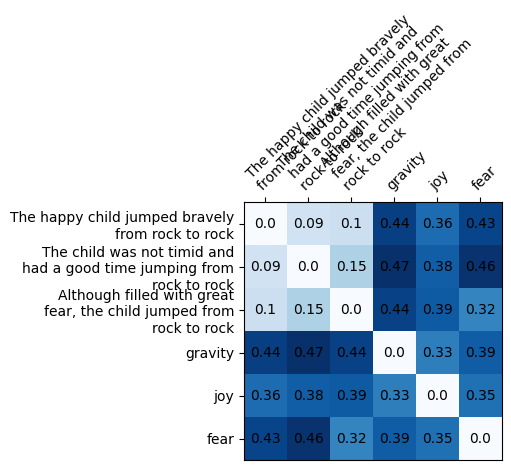

In [5]:
words = [
    "The happy child jumped bravely from rock to rock",
    "The child was not timid and had a good time jumping from rock to rock",
    "Although filled with great fear, the child jumped from rock to rock",
    "gravity",
    "joy",
    "fear"
]   

embs = [
    np.array(embeddings.embed_query(word)) for word in words
]

data = np.array([
    [calculate_l2(e1,e2) for e1 in embs] for e2 in embs
])

plot(data, words)